In [4]:
import random
from pathlib import Path

import numpy as np
import pandas as pd
import torch

from forecast import load_data, train, validate

seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)


if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

epoch,train_loss,valid_loss,mae,_rmse,mape,time
0,0.012183,0.011798,0.062102,0.108619,9.885427,05:48
1,0.011698,0.011128,0.062022,0.105488,10.892615,05:43
2,0.010164,0.010791,0.051448,0.103879,6.331662,05:41
3,0.010120,0.009085,0.049182,0.095314,7.431574,05:40
4,0.009351,0.011173,0.053405,0.105702,10.347570,05:43
5,0.008879,0.008589,0.050998,0.092675,8.336701,05:44
6,0.006754,0.007373,0.045206,0.085865,7.111097,05:43
7,0.003618,0.003325,0.034140,0.057664,4.870289,05:41
8,0.003068,0.002514,0.029970,0.050137,4.349334,05:44
9,0.002268,0.002769,0.033126,0.052617,4.082560,05:43


MAE: 0.0019109612330794334, RMSE: 0.003313744440674782, MAPE: 0.19122247397899628


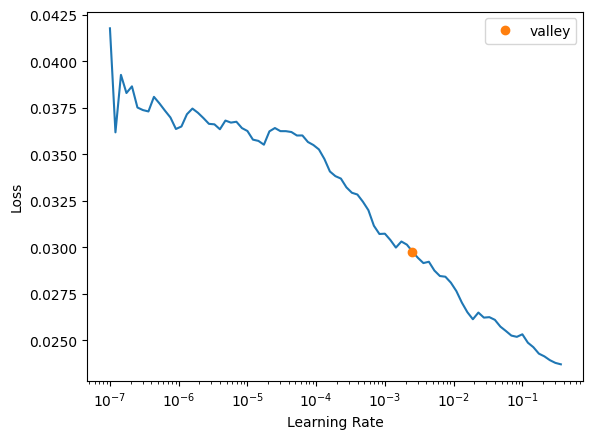

In [6]:
sc, data, _, _, dls = load_data(
    Path('./data/zt/key1_20240618_20240718'), '31.24*', device=device)
learner = train(dls, epochs=100, show_plot=True)
valX, valY = dls.valid.one_batch()
mae_score, rmse_score, mape_score = validate(
    valX, valY, learner=learner)
print(f'MAE: {mae_score}, RMSE: {rmse_score}, MAPE: {mape_score}')